<a href="https://colab.research.google.com/github/AnamayaSaraogi/Human-Face-Recognition-Model/blob/main/Human_Face_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change "runtime type" to "GPU" for faster execution

In [ ]:
# Install TensorFlow
!pip install tensorflow

# Check for GPU
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "not available")

GPU is available


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


The dataset is stored in Google Drive and is structured as follows:

A main folder named dataset contains two subfolders: human_face and not_a_face.
- The human_face folder contains images of human faces.
- The not_a_face folder contains images that do not depict human faces.

In [ ]:
import os

dataset_path = '/content/drive/My Drive/dataset'

# Verifying the contents
print("Contents of dataset folder:", os.listdir(dataset_path))

# Checking the subfolders
human_face_path = os.path.join(dataset_path, "human_face")
not_a_face_path = os.path.join(dataset_path, "not_a_face")

print("Number of images in 'human_face':", len(os.listdir(human_face_path)))
print("Number of images in 'not_a_face':", len(os.listdir(not_a_face_path)))


Contents of dataset folder: ['human_face', 'not_a_face']
Number of images in 'human_face': 2050
Number of images in 'not_a_face': 2050


# Data Preprocessing and Loading for Binary Classification

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# target image size
image_size = (100, 100)

# ImageDataGenerator for rescaling the images and loading the dataset
datagen = ImageDataGenerator(rescale=1./255)

# training data from the 'human_face' and 'not_a_face' folders
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # Two classes: human_face and not_a_face
    shuffle=True
)

# Check a sample of the data
for images, labels in train_generator:
    print(images.shape)  # Shape of the images batch
    print(labels.shape)  # Shape of the labels batch
    break


Found 4100 images belonging to 2 classes.
(32, 100, 100, 3)
(32,)


# Model Architecture and Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

# model architecture
model = Sequential([
    Input(shape=(100, 100, 3)),  # Input layer specifying shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer: sigmoid for binary classification (face or not)
])


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # increase this for better results
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 882s 6s/step - accuracy: 0.7081 - loss: 0.5673
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 127us/step - accuracy: 0.8125 - loss: 0.3887  
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


128/128 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8954 - loss: 0.2608
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 78us/step - accuracy: 0.9375 - loss: 0.1563   
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9430 - loss: 0.1572
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 68us/step - accuracy: 1.0000 - loss: 0.0218   
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 129s 977ms/step - accuracy: 0.9651 - loss: 0.1001
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 69us/step - accuracy: 0.8438 - loss: 0.1944   
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 141s 976ms/step - accuracy: 0.9556 - loss: 0.1191
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 73us/step - accuracy: 1.0000 - loss: 0.0452   


In [ ]:
#saving the model in google drive
model.save('/content/drive/My Drive/face_recognition.keras')

# Loading and using the model from google drive

In [4]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/face_recognition.keras')

We can implement the model in two ways:
1. The user is asked to input an image and output just displays a message accordingly. The image is not displayed.

In [10]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(100, 100))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Upload the image
uploaded = files.upload()

# Get the uploaded image file path (it will be available in the current directory)
image_path = list(uploaded.keys())[0]

# Preprocess the image and make a prediction
test_image = preprocess_image(image_path)
# Make a prediction
prediction = model.predict(test_image)

# Inverse the logic if needed
if prediction[0] < 0.5:
    print("It is a human face.")
else:
    print("It is not a human face.")



Saving man.jpg to man (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
It is a human face.


2. The user provides an input image, and the output displays the image alongside an appropriate message.

Saving man.jpg to man (3).jpg


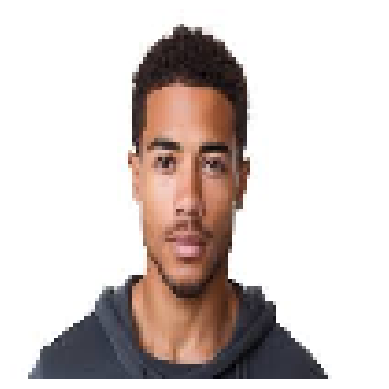

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
It is a human face.


In [9]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(100, 100))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array, img  # Return the original image as well for displaying

# Upload the image
uploaded = files.upload()

# Get the uploaded image file path (it will be available in the current directory)
image_path = list(uploaded.keys())[0]

# Preprocess the image and make a prediction
test_image, original_img = preprocess_image(image_path)

# Display the uploaded image
plt.imshow(original_img)
plt.axis('off')  # Hide axes for a clean display
plt.show()

# Make a prediction
prediction = model.predict(test_image)

# Inverse the logic if needed
if prediction[0] < 0.5:
    print("It is a human face.")
else:
    print("It is not a face.")


# Loading and using the model from GitHub

In [7]:
import requests
from tensorflow.keras.models import load_model

# Correct raw GitHub URL to the .keras file
url = 'https://raw.githubusercontent.com/AnamayaSaraogi/face-recognition/main/face_recognition.keras'

# Download the file
response = requests.get(url)
with open('face_recognition.keras', 'wb') as f:
    f.write(response.content)

# Load the model
model1 = load_model('face_recognition.keras')

print("Model loaded successfully!")

Model loaded successfully!


Saving cat.jpg to cat (1).jpg


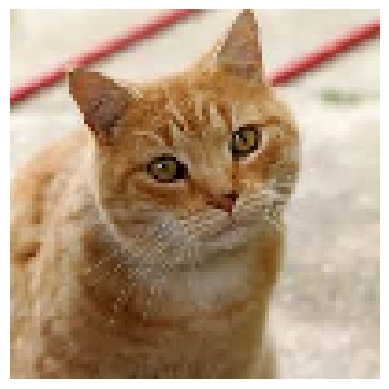

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
It is not a human face.


In [11]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(100, 100))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array, img  # Return the original image as well for displaying

# Upload the image
uploaded = files.upload()

# Get the uploaded image file path (it will be available in the current directory)
image_path = list(uploaded.keys())[0]

# Preprocess the image and make a prediction
test_image, original_img = preprocess_image(image_path)

# Display the uploaded image
plt.imshow(original_img)
plt.axis('off')  # Hide axes for a clean display
plt.show()

# Make a prediction
prediction = model1.predict(test_image)

# Inverse the logic if needed
if prediction[0] < 0.5:
    print("It is a human face.")
else:
    print("It is not a human face.")
